In [1]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 70)

In [2]:
df_model_short = pd.read_csv('df_model_short_base_try.csv')

## Clustering

In [26]:
df_model_short = df_model_short.drop(columns=['age_count', 'gender_count', 'salary_count', 'visit_count'])
#df.set_index('h3_9', inplace=True)

In [33]:
all_columns = df_model_short.columns.to_list()
#all_columns

In [36]:
df_hex_original = df_model_short
df_hex_original = pd.get_dummies(df_hex_original, columns=['name'])

In [35]:
#df_hex_original = df_hex_original.drop(columns=['Clusters'])

In [38]:
df_for_pca = df_hex_original.drop(columns=['h3_9', 'centroid_lat', 'centroid_lon'])

In [49]:
scaler = StandardScaler()
scaler.fit(df_for_pca)
scaled_df_nost = pd.DataFrame(scaler.transform(df_for_pca),columns= df_for_pca.columns )

pca = PCA(n_components=None, random_state = 15).fit(scaled_df_nost)


varExplainedRatio = pca.explained_variance_ratio_
print(varExplainedRatio)
print()
cumulVarExplained = np.cumsum(varExplainedRatio)
cumulVarExplained

[8.25896955e-02 6.78646634e-02 4.54011371e-02 4.29411847e-02
 3.55805106e-02 2.62104733e-02 2.46618796e-02 2.01168083e-02
 1.86530587e-02 1.79566081e-02 1.69392990e-02 1.57154584e-02
 1.54666985e-02 1.49133521e-02 1.45880482e-02 1.37384912e-02
 1.31162960e-02 1.28855660e-02 1.25155274e-02 1.22434302e-02
 1.21281029e-02 1.19977789e-02 1.14324585e-02 1.13993209e-02
 1.13262168e-02 1.11411108e-02 1.10208111e-02 1.08266139e-02
 1.06692835e-02 1.03734529e-02 1.03505322e-02 1.00510135e-02
 9.95508628e-03 9.85757070e-03 9.70799940e-03 9.53808289e-03
 9.48504978e-03 9.31191501e-03 9.07427589e-03 8.85148704e-03
 8.80717907e-03 8.53969003e-03 8.32318690e-03 8.25643527e-03
 8.11012993e-03 7.95771661e-03 7.83701438e-03 7.67747261e-03
 7.63572926e-03 7.60086014e-03 7.53483994e-03 7.40726001e-03
 7.25432115e-03 6.94544567e-03 6.90735181e-03 6.69354949e-03
 6.50731499e-03 6.46182677e-03 6.32227477e-03 6.20527716e-03
 6.01494625e-03 5.92112818e-03 5.90375283e-03 5.71084516e-03
 5.65222862e-03 5.449241

array([0.0825897 , 0.15045436, 0.1958555 , 0.23879668, 0.27437719,
       0.30058766, 0.32524954, 0.34536635, 0.36401941, 0.38197602,
       0.39891532, 0.41463078, 0.43009748, 0.44501083, 0.45959888,
       0.47333737, 0.48645366, 0.49933923, 0.51185476, 0.52409819,
       0.53622629, 0.54822407, 0.55965653, 0.57105585, 0.58238206,
       0.59352318, 0.60454399, 0.6153706 , 0.62603988, 0.63641334,
       0.64676387, 0.65681488, 0.66676997, 0.67662754, 0.68633554,
       0.69587362, 0.70535867, 0.71467059, 0.72374486, 0.73259635,
       0.74140353, 0.74994322, 0.75826641, 0.76652284, 0.77463297,
       0.78259069, 0.7904277 , 0.79810517, 0.8057409 , 0.81334176,
       0.8208766 , 0.82828386, 0.83553818, 0.84248363, 0.84939098,
       0.85608453, 0.86259185, 0.86905367, 0.87537595, 0.88158123,
       0.88759617, 0.8935173 , 0.89942105, 0.9051319 , 0.91078413,
       0.91623337, 0.92156849, 0.92681555, 0.93197861, 0.93708536,
       0.94214096, 0.94683793, 0.95142634, 0.95584478, 0.96013

In [50]:
def varplot(x, label, h=0):
    plt.plot(range(len(x)), x, linestyle="-.")
    plt.title('Plot of '+ label + ' variance')
    plt.xticks(range(len(x)), [y+1 for y in range(len(x))])
    plt.xlabel('Principal components')
    plt.axhline(h)
    plt.grid()
    plt.xticks(np.arange(0, 100, step=5))
    plt.show()

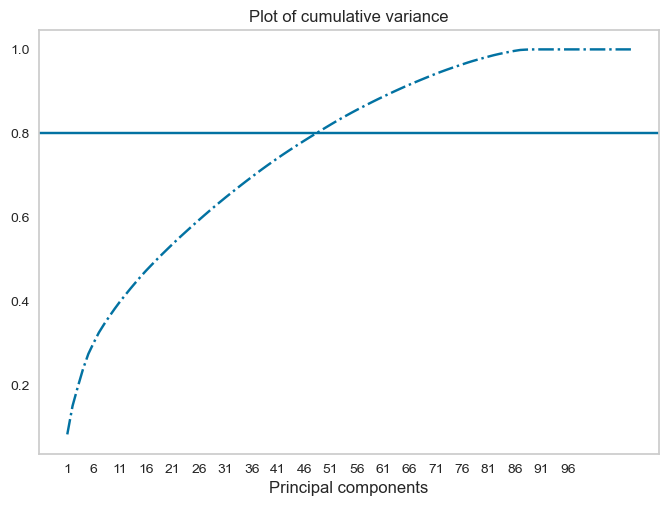

In [51]:
varplot(cumulVarExplained, "cumulative", h=0.8)

Elbow Method for PCA_df_nost


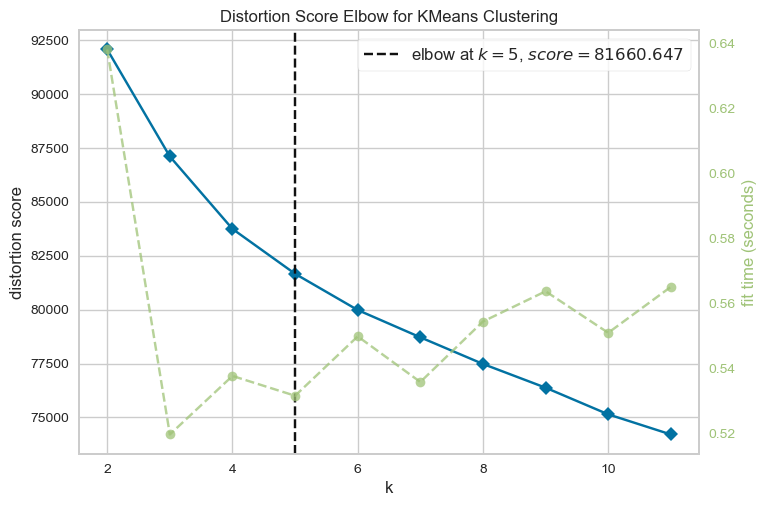

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pca = PCA(n_components=40, random_state = 14)
pca.fit(scaled_df_nost)
columns_list = ["col" + str(i) for i in range(1, 41)]
PCA_df_nost = pd.DataFrame(pca.transform(scaled_df_nost), columns=(columns_list))

#Смотрим сколько кластеров нужно брать
print('Elbow Method for PCA_df_nost')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(PCA_df_nost)
Elbow_M.show()

In [53]:
kmeans = KMeans(n_clusters=5, random_state=15)
cluster_kmeans = kmeans.fit_predict(PCA_df_nost)

PCA_df_nost["Clusters"] = cluster_kmeans
df_for_pca["Clusters"] = cluster_kmeans
df_hex_original["Clusters"] = cluster_kmeans

In [54]:
plot_colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']

In [55]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [56]:
#Функция для инфы ок кластере, смотрим на баланс и на средние значения
def clust_review(dataframe, condition_column, end_value):
    
    pl = sns.countplot(x=dataframe["Clusters"], palette = plot_colors)
    pl.set_title("Distribution Of The Clusters")
    plt.show()
    print(color.BOLD+"MEAN VALUE FOR EACH FEATURE"+color.END)
    mean_values_dict = {}
    count_values_dict = {}
    for condition_value in range(end_value + 1):
        filtered_df = dataframe[dataframe[condition_column] == condition_value]
        mean_values = filtered_df.mean()
        mean_values_dict[condition_value] = mean_values
        count_values_dict[condition_value] = len(filtered_df)
    result_df = pd.DataFrame(mean_values_dict).transpose()
    result_df.index.name = condition_column
    result_df = result_df.drop(condition_column, axis=1)
    result_df['Size of the clusters'] = pd.Series(count_values_dict)
    result_df = result_df.round(2)
    pd.set_option('display.max_columns', 30)
    return result_df

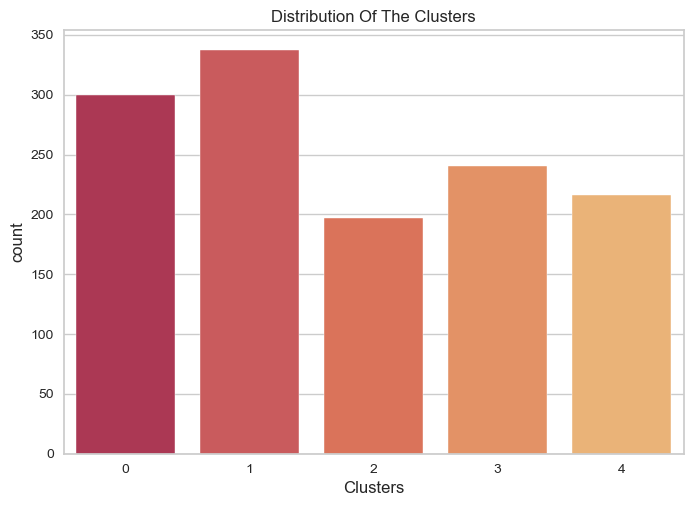

MEAN VALUE FOR EACH FEATURE


,avg_duration,weekday_visits_share,weekend_visits_share,Stay0_05h_share,Stay05_1h_share,Stay1_3h_share,Stay3_6h_share,Stay6_9h_share,Stay9_15h_share,Stay15_20h_share,Stay20_plus_share,Friday_share,Monday_share,Saturday_share,Sunday_share,...,name_Адмиралтейский район,name_Василеостровский район,name_Выборгский район,name_Калининский район,name_Кировский район,name_Красногвардейский район,name_Красносельский район,name_Московский район,name_Невский район,name_Петроградский район,name_Петродворцовый район,name_Приморский район,name_Фрунзенский район,name_Центральный район,Size of the clusters
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.77,0.66,0.34,0.0,0.13,0.53,0.17,0.08,0.06,0.02,0.02,0.16,0.16,0.17,0.17,...,0.02,0.03,0.08,0.10,0.05,0.11,0.12,0.11,0.17,0.00,0.0,0.08,0.11,0.01,300
1,4.20,0.65,0.35,0.0,0.11,0.51,0.17,0.09,0.07,0.02,0.02,0.16,0.16,0.17,0.17,...,0.03,0.05,0.09,0.11,0.09,0.09,0.09,0.07,0.13,0.00,0.0,0.15,0.09,0.01,337
2,3.61,0.61,0.39,0.0,0.09,0.59,0.16,0.07,0.05,0.01,0.02,0.10,0.18,0.19,0.20,...,0.11,0.07,0.08,0.07,0.06,0.07,0.01,0.08,0.11,0.13,0.0,0.08,0.05,0.11,197
3,4.09,0.64,0.36,0.0,0.08,0.55,0.17,0.08,0.07,0.02,0.02,0.14,0.17,0.18,0.18,...,0.14,0.08,0.06,0.03,0.02,0.02,0.01,0.07,0.02,0.14,0.0,0.05,0.02,0.33,240
4,5.63,0.65,0.35,0.0,0.05,0.44,0.19,0.12,0.11,0.04,0.05,0.15,0.16,0.17,0.18,...,0.06,0.03,0.12,0.12,0.09,0.05,0.10,0.08,0.07,0.02,0.0,0.16,0.07,0.02,216


In [57]:
clust_review(df_hex_original, 'Clusters', 4)

Cluster 0: This cluster is characterized by an average duration of visits around 3.77 hours, with a slight preference for weekday visits. Visitors in this cluster tend to stay between 1 to 3 hours (Stay1_3h_share is high). The district shares suggest that this cluster has notable activities or venues in Красногвардейский район and Невский район. This might indicate a mix of business and leisure areas with moderate visit durations.

Cluster 1: Similar to Cluster 0 but with a slightly higher average duration of visits, indicating potentially more engaging or numerous activities. This cluster has a balanced distribution of weekday and weekend visits, with a slight lean towards longer stays. The higher shares in Выборгский район and Калининский район could reflect specific regional attractions or business hubs.

Cluster 2: This cluster stands out with the shortest average visit duration and the highest weekend visits share, possibly with attractions visited during weekends like parks or cultural sites. The significant share in Адмиралтейский район and Петродворцовый район might indicate historical or tourist-heavy areas.

Cluster 3: Features longer visit durations similar to Cluster 1 but with a distinct pattern in day shares and a unique distribution across districts, notably high in Центральный район, indicating central, possibly cultural or administrative areas with significant weekend activity.

Cluster 4: This cluster has the longest average visit duration and distinct stay duration patterns, suggesting areas where people engage in extended activities, possibly including shopping centers or leisure complexes. Notable district involvement includes higher proportions in Выборгский район and Калининский район.